In [1]:
import pandas as pd

In [2]:
import numpy as np

In [4]:
data = pd.read_excel("Bike_Sales (1).xlsx")
data

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,2017-01-01,1,January,2017,17,Youth (<25),M,Canada,British Columbia,Bikes,Road Bikes,"Road-250 Red, 44",2,1519,2443,1848,3038,4886
1,2017-01-01,1,January,2017,23,Youth (<25),M,Australia,Victoria,Bikes,Mountain Bikes,"Mountain-200 Black, 46",2,1252,2295,2086,2504,4590
2,2017-01-01,1,January,2017,33,Young Adults (25-34),F,France,Yveline,Bikes,Road Bikes,"Road-150 Red, 48",2,2171,3578,2814,4342,7156
3,2017-01-01,1,January,2017,39,Adults (35-64),M,United States,Washington,Bikes,Road Bikes,"Road-550-W Yellow, 38",2,713,1120,814,1426,2240
4,2017-01-01,1,January,2017,42,Adults (35-64),M,United States,California,Bikes,Road Bikes,"Road-750 Black, 44",2,344,540,392,688,1080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,2021-12-31,31,December,2021,52,Adults (35-64),F,United Kingdom,England,Bikes,Road Bikes,"Road-250 Black, 58",2,1555,2443,1776,3110,4886
113032,2021-12-31,31,December,2021,25,Young Adults (25-34),F,Germany,Hessen,Bikes,Road Bikes,"Road-550-W Yellow, 38",1,713,1120,407,713,1120
113033,2021-12-31,31,December,2021,26,Young Adults (25-34),M,Australia,Queensland,Bikes,Road Bikes,"Road-550-W Yellow, 42",1,713,1120,407,713,1120
113034,2021-12-31,31,December,2021,33,Young Adults (25-34),F,Australia,New South Wales,Bikes,Mountain Bikes,"Mountain-200 Black, 38",1,1252,2295,1043,1252,2295


In [5]:
import matplotlib.pyplot as plt

<Axes: title={'center': 'Profit'}, xlabel='Country'>

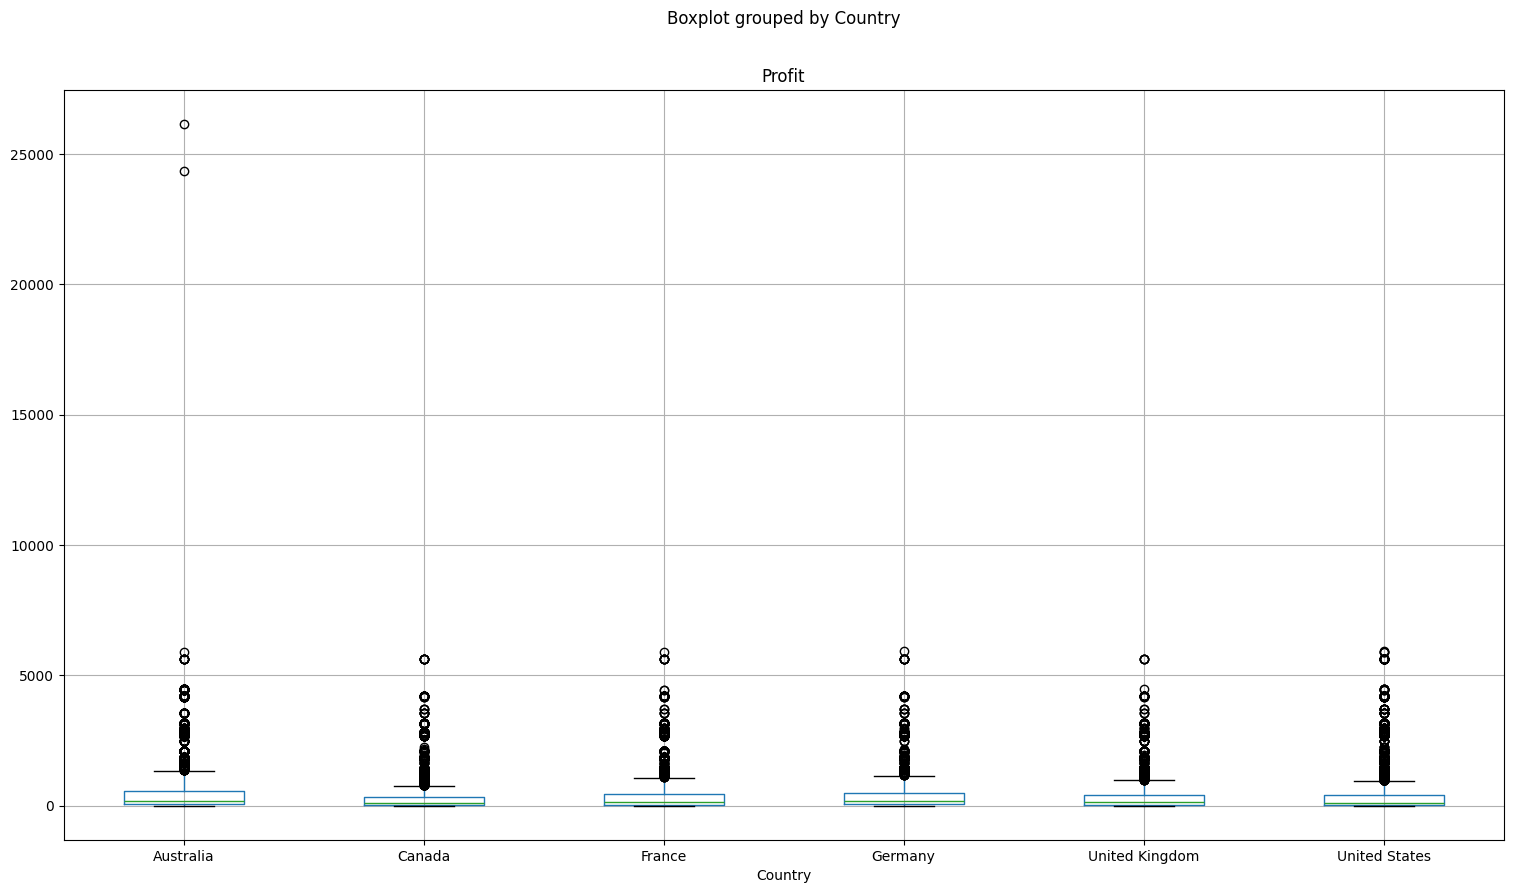

In [7]:
#between a categorical and numerical variable
data.boxplot(column='Profit',by= 'Country', figsize=(18,10)) 


In [17]:
#Anova test btween country and profit
#relationship between continuous and Categorical variables.
def FunctionAnova(inpData, Targetvariable, CategoricalPredictorList):
    from scipy.stats import f_oneway
    
    selectedPredictors=[]
    
    print('ANOVA TEST RESULTS')

 
    for predictor in CategoricalPredictorList:
        CategoricalgroupList = inpData.groupby(predictor)[Targetvariable].apply(list)
        AnovaResults = f_oneway(*CategoricalgroupList)
        if AnovaResults[1] < 0.05:
           print(predictor, 'is correlated with',Targetvariable, '| Pvalue; ', AnovaResults[1])
           selectedPredictors.append(predictor)
        else:
           print(predictor, 'is not correlated with',Targetvariable, '| Pvalue; ', AnovaResults[1])


    return(selectedPredictors)

CategoricalPredictorList=['Country']
FunctionAnova(inpData=data, 
              Targetvariable='Profit', 
              CategoricalPredictorList=CategoricalPredictorList)



ANOVA TEST RESULTS
Country is correlated with Profit | Pvalue;  8.970606044577626e-209


['Country']

In [19]:
data.dtypes

Date                datetime64[ns]
Day                          int64
Month                       object
Year                         int64
Customer_Age                 int64
Age_Group                   object
Customer_Gender             object
Country                     object
State                       object
Product_Category            object
Sub_Category                object
Product                     object
Order_Quantity               int64
Unit_Cost                    int64
Unit_Price                   int64
Profit                       int64
Cost                         int64
Revenue                      int64
dtype: object

In [21]:
#Relationship between two categorical variables
crosstabResult = pd.crosstab(index=data['Age_Group'],columns='Day')
print(crosstabResult)

col_0                   Day
Age_Group                  
Adults (35-64)        55824
Seniors (64+)           730
Young Adults (25-34)  38654
Youth (<25)           17828


<Axes: xlabel='Age_Group'>

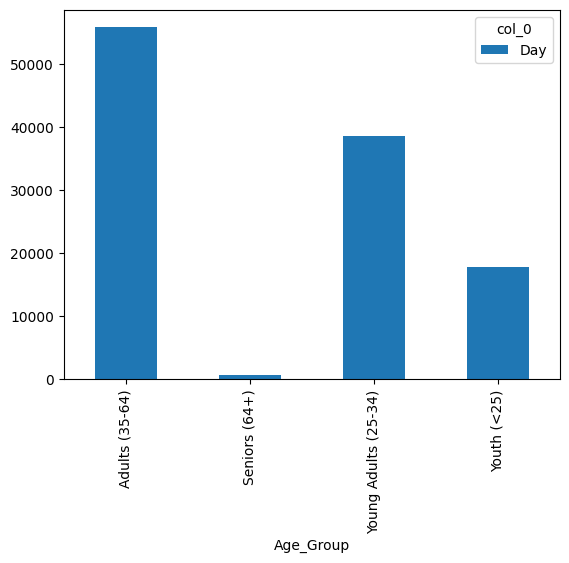

In [22]:
import matplotlib
%matplotlib inline
crosstabResult.plot.bar()

In [23]:
from scipy.stats import chi2_contingency

chisqResult= chi2_contingency(crosstabResult) 

print('The P-Value of the ChiSq Test is:', chisqResult[1])

The P-Value of the ChiSq Test is: 1.0


hence the there is no correlation between the variables, Day and Age_Group

<Axes: title={'center': 'Relationship between Profit and Cost'}, xlabel='Profit', ylabel='Cost'>

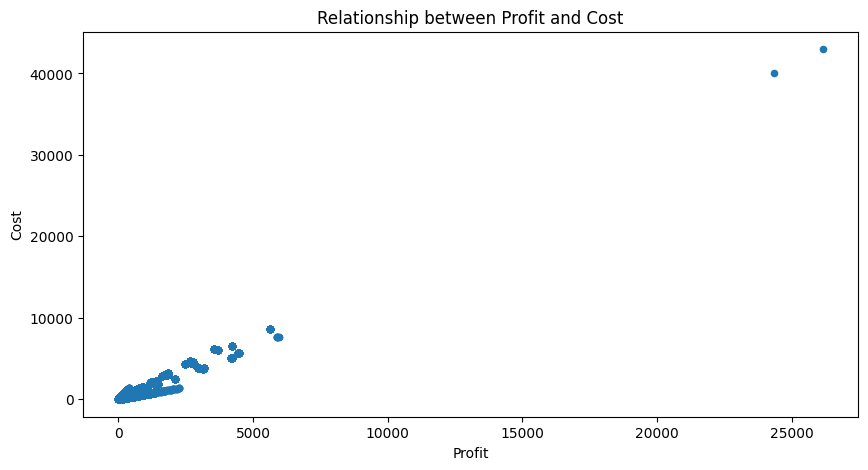

In [32]:
#Scatter plot between two continuous variables 
data.plot.scatter(x='Profit', y='Cost', figsize=(10,5), title='Relationship between Profit and Cost')

In [27]:
#statistcal test between continuous Variables 
ContinuousVariables = ['Unit_Price', 'Cost']
CorrelationData=data[ContinuousVariables].corr()
CorrelationData

,Unit_Price,Cost
Unit_Price,1.000000,0.826301
Cost,0.826301,1.000000


There is a strong positive correlation between Unit_Price and Cost

In [28]:
#data Mining
!pip install pyreadstat

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113036 entries, 0 to 113035
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Date              113036 non-null  datetime64[ns]
 1   Day               113036 non-null  int64         
 2   Month             113036 non-null  object        
 3   Year              113036 non-null  int64         
 4   Customer_Age      113036 non-null  int64         
 5   Age_Group         113036 non-null  object        
 6   Customer_Gender   113036 non-null  object        
 7   Country           113036 non-null  object        
 8   State             113036 non-null  object        
 9   Product_Category  113036 non-null  object        
 10  Sub_Category      113036 non-null  object        
 11  Product           113036 non-null  object        
 12  Order_Quantity    113036 non-null  int64         
 13  Unit_Cost         113036 non-null  int64         
 14  Unit

In [30]:
data.describe()

,Date,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,113036,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000,113036.000000
mean,2020-01-06 01:36:09.376127744,15.665753,2019.520153,35.919212,11.901660,267.296366,452.938427,372.681358,469.318695,842.000053
min,2017-01-01 00:00:00,1.000000,2017.000000,17.000000,1.000000,1.000000,2.000000,1.000000,1.000000,2.000000
25%,2019-01-09 00:00:00,8.000000,2019.000000,28.000000,2.000000,2.000000,5.000000,39.000000,28.000000,70.000000
50%,2019-10-16 00:00:00,16.000000,2019.500000,35.000000,10.000000,9.000000,24.000000,135.000000,108.000000,245.000000
75%,2021-01-28 00:00:00,23.000000,2021.000000,43.000000,20.000000,42.000000,70.000000,432.000000,432.000000,880.000000
max,2021-12-31 00:00:00,31.000000,2021.000000,87.000000,32.000000,2171.000000,3578.000000,26158.000000,42978.000000,69136.000000
std,NaN,8.781567,1.179704,11.021936,9.561857,549.835483,922.071219,595.080571,884.866118,1466.202934


In [31]:
#For a partivular column
data['Profit'].describe()

count    113036.000000
mean        372.681358
std         595.080571
min           1.000000
25%          39.000000
50%         135.000000
75%         432.000000
max       26158.000000
Name: Profit, dtype: float64

In [33]:
#For non-numeric variables
data.describe(include=object)

,Month,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product
count,113036,113036,113036,113036,113036,113036,113036,113036
unique,12,4,2,6,53,3,17,130
top,June,Adults (35-64),M,United States,California,Accessories,Tires and Tubes,Water Bottle - 30 oz.
freq,11234,55824,58312,39206,22450,70120,33870,10794


In [34]:
#Checking for missing values 
data.isna()

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113031,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113032,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113033,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
113034,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
# Sum of the missing values 
data.isna().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [37]:
import seaborn as sns #visual library
import matplotlib as mat